In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


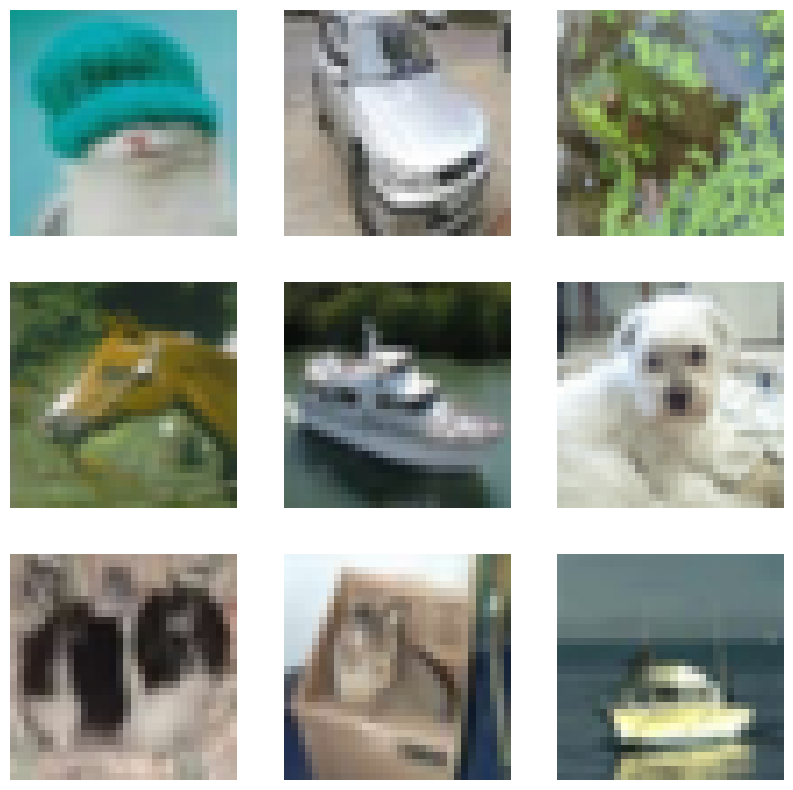

In [5]:
fig, axs = plt.subplots(3,3, figsize=(10,10))
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(x_train[np.random.randint(0, x_train.shape[0])], cmap='gray')
        axs[i,j].axis('off')
plt.show()

In [6]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.2670 - loss: 2.1540 - val_accuracy: 0.3628 - val_loss: 1.7702
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.3640 - loss: 1.7612 - val_accuracy: 0.4006 - val_loss: 1.6976
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.3852 - loss: 1.7134 - val_accuracy: 0.3494 - val_loss: 1.7839
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.3893 - loss: 1.6994 - val_accuracy: 0.4156 - val_loss: 1.6638
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - accuracy: 0.4027 - loss: 1.6651 - val_accuracy: 0.4104 - val_loss: 1.6812
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.4085 - loss: 1.6423 - val_accuracy: 0.3932 - val_loss: 1.6730
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.4084 - loss: 1.6524 - val_accuracy: 0.4558 - val_loss: 1.5447
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.4095 - loss: 1.6465 - 